## Capstone Project 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from glob import glob
import re
import scipy.stats as st

### Dataset sources

http://download.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/PartD_Prescriber_PUF_NPI_13.zip

http://download.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/PartD_Prescriber_PUF_NPI_14.zip

https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/PartD_Prescriber_PUF_NPI_Drug_Category_Lists_15.zip

https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/PartD_Prescriber_PUF_NPI_Drug_Category_Lists_16.zip

https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/PartD_Prescriber_PUF_NPI_Drug_Category_Lists_17.zip

In [2]:
#%%time
filenames = glob('data/PartD*.txt')
years = ['2013', '2014', '2015', '2016', '2017']
dataframes = []
chunk = 10**5
for year,filename in zip(years,filenames):
    reader = pd.read_csv(filename, sep='\t', chunksize = chunk)
    for chunk_df in reader:
        chunk_df['year'] = year
        #chunk_df['id'] = chunk_df[['npi','year']].apply(lambda x: '_'.join(str(value) for value in x), axis=1)
        chunk_df.npi = chunk_df.npi.map(lambda x: str(x))
        dataframes.append(chunk_df)

df2 = pd.concat(dataframes, sort=False)
#print('complete')

In [3]:
df2.shape

(5518978, 85)

In [4]:
df2.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score,year
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,NaN,NaN,NaN,0.0,0.0,NaN,79.0,54.0,2.3405,2013
1,1003000142,KHALIL,RASHID,NaN,M.D.,M,I,4126 N HOLLAND SYLVANIA RD,SUITE 220,TOLEDO,...,77.0,NaN,NaN,NaN,0.0,NaN,53.0,48.0,1.6070,2013
2,1003000167,ESCOBAR,JULIO,E,DDS,M,I,5 PINE CONE RD,NaN,DAYTON,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.9802,2013
3,1003000175,REYES-VASQUEZ,BELINDA,NaN,D.D.S.,F,I,322 N AZUSA AVE STE 202,NaN,LA PUENTE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
4,1003000183,CYPHERS,DENNIS,J,L.M.P,M,I,6930 52ND AVE W,NaN,TACOMA,...,35.0,NaN,0.0,NaN,NaN,0.0,36.0,19.0,1.6993,2013


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5518978 entries, 0 to 1162897
Data columns (total 85 columns):
npi                                 object
nppes_provider_last_org_name        object
nppes_provider_first_name           object
nppes_provider_mi                   object
nppes_credentials                   object
nppes_provider_gender               object
nppes_entity_code                   object
nppes_provider_street1              object
nppes_provider_street2              object
nppes_provider_city                 object
nppes_provider_zip5                 float64
nppes_provider_zip4                 float64
nppes_provider_state                object
nppes_provider_country              object
specialty_description               object
description_flag                    object
medicare_prvdr_enroll_status        object
total_claim_count                   int64
total_30_day_fill_count             float64
total_drug_cost                     float64
total_day_supply        

In [6]:
# Initial exploratory statistical analysis to investigate outliers
df2.describe()

,nppes_provider_zip5,nppes_provider_zip4,total_claim_count,total_30_day_fill_count,total_drug_cost,total_day_supply,bene_count,total_claim_count_ge65,total_30_day_fill_count_ge65,total_drug_cost_ge65,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
count,5.518678e+06,4.874660e+06,5.518978e+06,5.518978e+06,5.518978e+06,5.518978e+06,4.840546e+06,4.316217e+06,4.316217e+06,4.316217e+06,...,3.796118e+06,2.537492e+06,1.806828e+06,2.459794e+06,1.897117e+06,3.974576e+06,1.852555e+06,3.175351e+06,3.175351e+06,4.840546e+06
mean,4.804005e+04,3.775542e+03,1.305351e+03,1.918714e+03,1.201136e+05,5.318582e+04,1.519888e+02,1.268135e+03,1.959548e+03,1.036299e+05,...,7.595943e+01,1.697768e+02,2.857684e+01,4.502838e+00,2.573390e+01,2.352417e-01,1.107158e+00,1.429737e+02,6.492693e+01,1.464647e+00
std,3.033117e+04,2.249348e+03,3.142083e+03,4.491688e+03,3.217170e+05,1.259569e+05,1.957043e+02,2.859206e+03,4.261539e+03,2.431050e+05,...,9.143272e+01,1.903542e+02,5.964430e+01,3.508857e+01,8.335332e+01,4.095007e+00,5.980767e+00,1.718665e+02,8.418440e+01,6.735684e-01
min,0.000000e+00,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.989000e-01
25%,2.120100e+04,2.045000e+03,5.200000e+01,6.050000e+01,1.576460e+03,9.400000e+02,3.300000e+01,6.700000e+01,7.800000e+01,2.165900e+03,...,2.300000e+01,4.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.600000e+01,2.000000e+01,1.062700e+00
50%,4.503000e+04,3.332000e+03,1.950000e+02,2.285000e+02,9.739350e+03,4.444000e+03,8.300000e+01,2.320000e+02,2.822000e+02,1.312850e+04,...,4.600000e+01,1.110000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.500000e+01,4.000000e+01,1.298200e+00
75%,7.664200e+04,5.139000e+03,9.860000e+02,1.333700e+03,9.318670e+04,3.587200e+04,2.020000e+02,1.067000e+03,1.549400e+03,9.657091e+04,...,9.600000e+01,2.350000e+02,3.300000e+01,0.000000e+00,2.200000e+01,0.000000e+00,0.000000e+00,1.920000e+02,7.900000e+01,1.664100e+00
max,9.992900e+04,9.999000e+03,4.472880e+05,4.479605e+05,2.645885e+07,5.634058e+06,3.996500e+04,3.791620e+05,3.797510e+05,1.342742e+07,...,1.655700e+04,2.531600e+04,3.592000e+03,4.309000e+03,1.135300e+04,4.020000e+02,9.950000e+02,2.813900e+04,1.182600e+04,1.164220e+01


Initial removal of unnecessary character columns (example street address, names, middle initials and flags) based on instructions and recommendations from the data source documentation https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Downloads/Prescriber_Methods.pdf

This process may be repeated when columns are further analyzed for redundancy and relevancy to the response variable

In [7]:
# Removing unnecessary columns from the dataframe
pattern1 = re.compile('suppress')
pattern2 = re.compile('nppes')
to_remove = [i for i in df2.columns if pattern1.findall(i) or pattern2.findall(i)] + ['description_flag']
to_remove = [i for i in to_remove if i not in ('nppes_provider_gender','nppes_provider_zip5','nppes_provider_state')]

to_remove # List of columns to be removed

['nppes_provider_last_org_name',
 'nppes_provider_first_name',
 'nppes_provider_mi',
 'nppes_credentials',
 'nppes_entity_code',
 'nppes_provider_street1',
 'nppes_provider_street2',
 'nppes_provider_city',
 'nppes_provider_zip4',
 'nppes_provider_country',
 'ge65_suppress_flag',
 'bene_count_ge65_suppress_flag',
 'brand_suppress_flag',
 'generic_suppress_flag',
 'other_suppress_flag',
 'mapd_suppress_flag',
 'pdp_suppress_flag',
 'lis_suppress_flag',
 'nonlis_suppress_flag',
 'antipsych_ge65_suppress_flag',
 'antipsych_bene_ge65_suppress_flg',
 'description_flag']

In [8]:
df3 = df2.drop(to_remove,axis=1)

In [9]:
df3.shape # Checking the shape of the reduced dataframe to show number of columns is now 61

(5518978, 63)

In [10]:
df3.isnull().sum() # Checking for number of null values within columns

npi                                     0
nppes_provider_gender                6815
nppes_provider_zip5                   300
nppes_provider_state                    0
specialty_description                   0
                                   ...   
beneficiary_race_other_count      3666423
beneficiary_nondual_count         2343627
beneficiary_dual_count            2343627
beneficiary_average_risk_score     678432
year                                    0
Length: 63, dtype: int64

The 'nppes_provider_zip5' missing values are associated with non-US claims. The zip code will be imputed with the integer '99999' and the non-US countries will be replaced with 'non-US'. 

Likewise, the 'nppes_provider_gender' column has 63 null values, which are associated with npis that are not actual physicians but institutions. Hence, the missing gender entries will be replaced with the string 'X'.

In [11]:
# Imputing the string 'X' for missing 'nppes_provider_gender' entries
df3['nppes_provider_gender'].fillna('X', inplace=True)

# Imputing the integer '99999' for missing 'nppes_provider_zip5' entries and converting values to string    
df3['nppes_provider_zip5'].fillna(99999, inplace=True)
df3['nppes_provider_zip5'] = df3['nppes_provider_zip5'].map(lambda x: str(x))

Except for 'opioid_prescriber_rate', 'la_opioid_prescriber_rate', 'average_age_of_beneficiaries' and 'beneficiary_average_risk_score' columns, the missing values in the numerical columns were generally missing at random and typically occur when the Medicare PartD total claim or total beneficiary count was less than 11 (i.e. between 1 and 10) as well as when a subcategory member count was less than 11. Subcategories columns are columns whose cumulative sum make up the primary total column. 

For example brand_claim_count, generic_claim_count and other_claim_count are subcategories of total_claim_count. Additionally, mapd_claim_count and pdp_claim_count are also subcategories of total_claim_count. They describe the proportions of total claims associated with Medicare Advantage Prescription Drug (MAPD) plan or Medicare Part D Prescription Drug (PDP) plan, respectively.

The total_claim_count was never null. However, in situations where the bene_count was less than 11 the missing values were imputed with the integer '5' as recommended by the documentation that accompanied the data source.

Since the subcategory counts and costs aggregates are fractions of the corresponding totals, the average proportions of each subcategory relative to its corresponding total was calculated and this value was used in the imputation of missing subcategory values. A data frame, df_sub (about 150,000 rows) containing rows with > 57 non-null values was subsetted and used to calculate the average proportions of each subcategory relative to its corresponding total.

In [12]:
# Imputing the integer '5' for missing entries in 'bene_count' 
df3['bene_count'].fillna(5, inplace=True)

In [13]:
# Creating a subset dataframe (df_sub) of rows with non-missing values > 57 out of 61
df_sub = df3[df3.notnull().sum(axis=1) > 57]

In [14]:
# df_sub was exported as a csv file. The average subcategory proportions was calculated using excel 
# and the file was re-imported as a new dataframe, 'multiplier.xlsx' 

# importing the file containing the calculated proportion values into a new dataframe, impute
impute = pd.read_excel('data/df_sub_props.xlsx', sheet_name='Sheet1')
impute.columns = ['column_names','ref_total','multiplier']
impute['ref_total'] = impute['ref_total'].map(lambda x: x.strip())

#### Explanation of how the impute dataframe will be used to impute values:
Using 'brand_claim_count' (row index 5 in the impute dataframe below), the ref_total is 'total_claim_count', and the multiplier is 0.208034. This means that on average, brand_claim_count represents 0.208034 parts or about 20.8% of the total_claim_counts per physician. Hence, missing brand_claim_counts will be imputed as (multiplier * total_claim_count) for that row.

In [15]:
impute

,column_names,ref_total,multiplier
0,total_claim_count_ge65,total_claim_count,0.826511
1,total_30_day_fill_count_ge65,total_30_day_fill_count,0.849652
2,total_drug_cost_ge65,total_drug_cost,0.772285
3,total_day_supply_ge65,total_day_supply,0.852593
4,bene_count_ge65,bene_count,0.841039
5,brand_claim_count,total_claim_count,0.208034
6,brand_drug_cost,total_drug_cost,0.743894
7,generic_claim_count,total_claim_count,0.783205
8,generic_drug_cost,total_drug_cost,0.251573
9,other_claim_count,total_claim_count,0.008761


In [16]:
df4 = df3.copy() # Creating a copy of the df before imputation of subcategory columns

In [17]:
# Imputing missing subcategory numerical columns based on calculated multipliers

for column_name, total_count, multiplier in zip(impute['column_names'], impute['ref_total'], impute['multiplier']):
    col_list = [(j * multiplier) if str(i) == 'nan' else i for i,j in zip(df4[column_name],df4[total_count])]
    df4[column_name] = col_list

In [18]:
# Randomly selecting columns to inspect imputation method for accuracy by comparing df2 and df2_clean dataframes
sub_cat = 'brand_claim_count'
total = 'total_claim_count'

print('{:<25} {:<30} {}'.format('df3_' + sub_cat, 'df4_' + sub_cat, total))
for i,j,k in zip(df3[sub_cat][:20], df4[sub_cat][:20], df3[total][:20]):
    print('{:<25} {:<30} {}'.format(i,j,k))    

df3_brand_claim_count     df4_brand_claim_count          total_claim_count
nan                       75.51639683904935              363
50.0                      50.0                           512
0.0                       0.0                            69
nan                       2.704443963932897              13
nan                       17.058800387884425             82
12.0                      12.0                           60
nan                       88.83058250764208              427
0.0                       0.0                            11
20.0                      20.0                           143
nan                       11.44187830894687              55
1054.0                    1054.0                         5357
1085.0                    1085.0                         6388
0.0                       0.0                            13
nan                       16.642732085740903             80
380.0                     380.0                          1375
19.0           

In [19]:
# Checking the percentage of null values in the non-subcategory numerical columns
df4.loc[:,['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 
    'average_age_of_beneficiaries','beneficiary_average_risk_score']].isnull().mean() * 100

opioid_prescriber_rate            28.979188
la_opioid_prescriber_rate         40.331561
average_age_of_beneficiaries      12.292711
beneficiary_average_risk_score    12.292711
dtype: float64

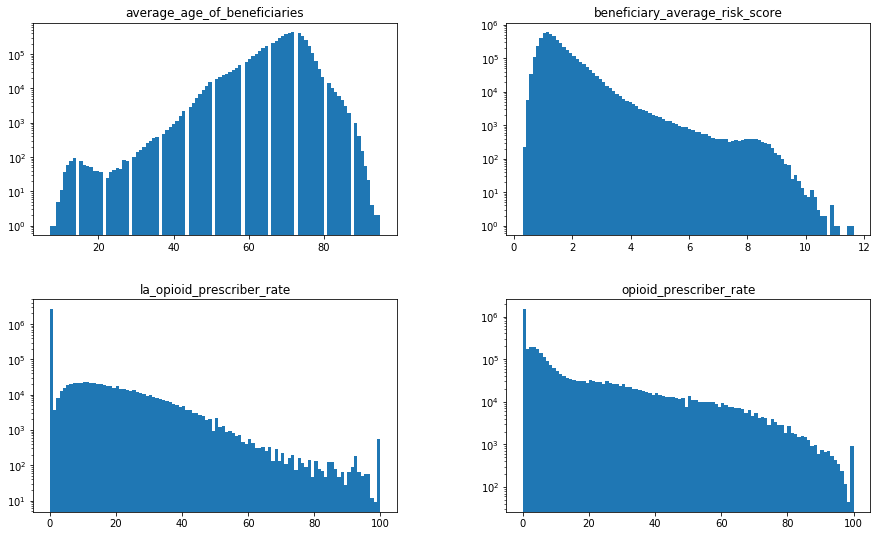

In [20]:
# Checking the frequency distribution of values in the non-subcategory numerical columns
df4.loc[:,['opioid_prescriber_rate','la_opioid_prescriber_rate','average_age_of_beneficiaries',
           'beneficiary_average_risk_score']].hist(bins=100, figsize=(15,9), grid=False, log=True) ;

#### Visualizing a covariance matrix of numerical variables

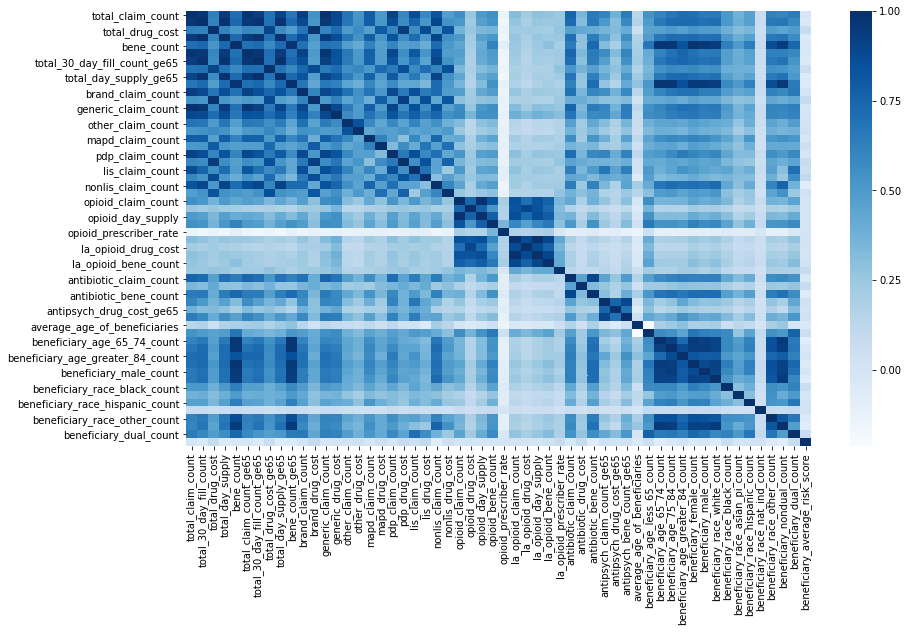

In [21]:
# Plotting the covariance matrix
fig, axes = plt.subplots(1, 1, figsize=(14,8), squeeze=False)
sns.heatmap(df4.corr(), cmap='Blues', ax=axes[0,0]) ;

In [22]:
# Identifying columns in the dataset with the highest correlations to the non-subcategory numerical columns
df4_corr = df4_corr.apply(lambda x: abs(x))

collection = {}
for col in df4_corr.index:
    collection[col] = (max([i for i in df4_corr[col] if i!= 1]), df4_corr[col].drop(df4_corr[col].idxmax()).idxmax())

high_corr = pd.DataFrame([collection]).T
high_corr['best_r'] = [i[0] for i in high_corr[0]]
high_corr['best_correlated'] = [i[1] for i in high_corr[0]]
del high_corr[0]
high_corr.drop_duplicates('best_r', inplace=True)
high_corr.sort_values('best_r', ascending=False, inplace=True)
high_corr.loc[['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 
              'average_age_of_beneficiaries', 'beneficiary_average_risk_score']]

,best_r,best_correlated
opioid_prescriber_rate,0.352689,opioid_bene_count
la_opioid_prescriber_rate,0.422805,la_opioid_claim_count
average_age_of_beneficiaries,0.291326,beneficiary_age_greater_84_count
beneficiary_average_risk_score,0.103345,lis_drug_cost


The columns, 'opioid_prescriber_rate', 'la_opioid_prescriber_rate', 'average_age_of_beneficiaries' and 'beneficiary_average_risk_score' were not very correlated to any of the other numerical columns in the dataset. Hence, regression will not be used for used for imputation. Column means will be used instead. However, with over 35% null values in 'la_opioid_prescriber_rate', 10% of the total rows in the dataframe will be deleted. The delected rows will consist of randomly selected rows with null 'la_opioid_prescriber_rate' values. 

In [23]:
# Deletion of a fraction of rows with null 'la_opioid_prescriber_rate' values and saving the reduced dataframe as df5
n = int(len(df4)*0.1)
df_del = df4[df4['la_opioid_prescriber_rate'].isnull()].sample(n=n)
df5 = df4.loc[~df4.index.isin(df_del.index)]
df5.shape

(3301613, 63)

In [24]:
# Checking the percentage of null values in the non-subcategory numerical columns of the reduced dataframe, df5
df5.loc[:,['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 
    'average_age_of_beneficiaries','beneficiary_average_risk_score']].isnull().mean() * 100

opioid_prescriber_rate            31.454413
la_opioid_prescriber_rate         33.712764
average_age_of_beneficiaries      11.273308
beneficiary_average_risk_score    11.273308
dtype: float64

Comparing descriptive statistics of df4 and df5 to make sure there are no major differences due to row deletion

In [25]:
# Descriptive stats before row deletion
df4.loc[:,['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 'average_age_of_beneficiaries', 
           'beneficiary_average_risk_score']].describe()

,opioid_prescriber_rate,la_opioid_prescriber_rate,average_age_of_beneficiaries,beneficiary_average_risk_score
count,3.919623e+06,3.293088e+06,4.840546e+06,4.840546e+06
mean,1.135850e+01,3.507559e+00,6.907073e+01,1.464647e+00
std,1.752549e+01,9.357896e+00,6.212785e+00,6.735684e-01
min,0.000000e+00,0.000000e+00,7.000000e+00,2.989000e-01
25%,0.000000e+00,0.000000e+00,6.600000e+01,1.062700e+00
50%,3.330000e+00,0.000000e+00,7.000000e+01,1.298200e+00
75%,1.504000e+01,0.000000e+00,7.300000e+01,1.664100e+00
max,1.000000e+02,1.000000e+02,9.500000e+01,1.164220e+01


In [26]:
# Descriptive stats after row deletion
df5.loc[:,['opioid_prescriber_rate', 'la_opioid_prescriber_rate', 'average_age_of_beneficiaries', 
           'beneficiary_average_risk_score']].describe()

,opioid_prescriber_rate,la_opioid_prescriber_rate,average_age_of_beneficiaries,beneficiary_average_risk_score
count,2.263110e+06,2.188548e+06,2.929412e+06,2.929412e+06
mean,1.237425e+01,3.502212e+00,6.908827e+01,1.461614e+00
std,1.797734e+01,9.345936e+00,6.132551e+00,6.717442e-01
min,0.000000e+00,0.000000e+00,7.000000e+00,2.989000e-01
25%,0.000000e+00,0.000000e+00,6.600000e+01,1.062000e+00
50%,4.140000e+00,0.000000e+00,7.000000e+01,1.296200e+00
75%,1.779000e+01,0.000000e+00,7.300000e+01,1.658100e+00
max,1.000000e+02,1.000000e+02,9.500000e+01,1.164220e+01


Using column means to impute null entries in 'opioid_prescriber_rate','la_opioid_prescriber_rate','average_age_of_beneficiaries' and 'beneficiary_average_risk_score'

In [27]:
df5['opioid_prescriber_rate'].fillna(df5['opioid_prescriber_rate'].mean(), inplace=True)
df5['la_opioid_prescriber_rate'].fillna(df5['la_opioid_prescriber_rate'].mean(), inplace=True)
df5['average_age_of_beneficiaries'].fillna(df5['average_age_of_beneficiaries'].mean(), inplace=True)
df5['beneficiary_average_risk_score'].fillna(df5['beneficiary_average_risk_score'].mean(), inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [28]:
df5.isnull().sum().sum() == 0 # Confirming that all columns no longer have null values

False

Adding a new column, 'npi_type_pref' and 'npi_drug_pref', to capture prescription type preference (brand or generic) or prescription drug preference (opioid, antibiotic, antipsych) per physician per year 

In [29]:
npi_type_pref, npi_drug_pref = [],[]
    
for i,j,k,l,m,n,o in zip(df5['total_claim_count'],df5['brand_claim_count'],
                         df5['generic_claim_count'],df5['opioid_claim_count'],
                         df5['la_opioid_claim_count'],df5['antibiotic_claim_count'],
                         df5['antipsych_claim_count_ge65']):
    a = [j/i, k/i]
    b = [l/i, m/i, n/i, o/i]
            
    if a[0] == a[1]:
        npi_type_pref.append('no_pref')
    elif a[0] > a[1]:
        npi_type_pref.append('brand')
    else:
        npi_type_pref.append('generic')
            
    maxb = [index for index,value in enumerate(b) if max(b) == value] 
    if len(maxb) > 1:
        npi_drug_pref.append('no_pref')
    else:
        if maxb[0] == 0:
            npi_drug_pref.append('opioid')
        elif maxb[0] == 1:
            npi_drug_pref.append('la_opioid')
        elif maxb[0] == 2:
            npi_drug_pref.append('antibiotic')
        elif maxb[0] == 3:
            npi_drug_pref.append('antipsych')        
            
df5['npi_type_pref'], df5['npi_drug_pref']  = npi_type_pref, npi_drug_pref 
df5.shape                               

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(3301613, 65)

In [30]:
# Inspecting newly created columns
df5['npi_type_pref'].value_counts(dropna=False)

generic    3176402
brand       122048
no_pref       3163
Name: npi_type_pref, dtype: int64

In [31]:
df5['npi_drug_pref'].value_counts(dropna=False)

antibiotic    1553335
opioid        1441989
no_pref        200022
antipsych      105738
la_opioid         529
Name: npi_drug_pref, dtype: int64

In [32]:
# Subsetting the variables
lst = ['opioid', 'generic', 'antipsych', 'brand', 'rate', 'antibiotic']
to_corr = []
for col in df5.columns:
    for i in lst:
        pattern = re.compile(i)
        if pattern.findall(col):
            to_corr.append(col)

to_corr = to_corr + ['opioid_prescriber_rate', 'la_opioid_prescriber_rate','average_age_of_beneficiaries',
           'beneficiary_average_risk_score']
to_corr

['brand_claim_count',
 'brand_drug_cost',
 'generic_claim_count',
 'generic_drug_cost',
 'opioid_claim_count',
 'opioid_drug_cost',
 'opioid_day_supply',
 'opioid_bene_count',
 'opioid_prescriber_rate',
 'opioid_prescriber_rate',
 'la_opioid_claim_count',
 'la_opioid_drug_cost',
 'la_opioid_day_supply',
 'la_opioid_bene_count',
 'la_opioid_prescriber_rate',
 'la_opioid_prescriber_rate',
 'antibiotic_claim_count',
 'antibiotic_drug_cost',
 'antibiotic_bene_count',
 'antipsych_claim_count_ge65',
 'antipsych_drug_cost_ge65',
 'antipsych_bene_count_ge65',
 'opioid_prescriber_rate',
 'la_opioid_prescriber_rate',
 'average_age_of_beneficiaries',
 'beneficiary_average_risk_score']